# 7.4.3 Gated Recurrent Unit (GRU)

## Explanation of Gated Recurrent Unit (GRU) networks
Gated Recurrent Unit (GRU) networks are a type of recurrent neural network (RNN) similar to Long Short-Term Memory (LSTM) networks, but with a simplified architecture. GRUs combine the cell state and hidden state into a single state and use two gates to regulate the flow of information:
1. The update gate, which determines how much of the previous state needs to be passed along to the future.
2. The reset gate, which controls how much of the past information to forget.

The simplicity of GRUs makes them computationally efficient and easier to train while still effectively capturing long-term dependencies.

## Scenarios where GRUs are beneficial
GRUs are particularly useful in scenarios where:
- Computational resources are limited, as GRUs are less computationally intensive than LSTMs.
- The training data is limited, as GRUs tend to generalize better on smaller datasets.
- Sequential data with long-term dependencies is involved, such as text, time series, and speech data.

## Methods for implementing GRUs
Implementing GRUs follows a similar process to that of LSTMs:
1. Preparing the sequential data.
2. Defining the GRU model architecture.
3. Compiling the model with an appropriate loss function and optimizer.
4. Training the model on the training data.
5. Evaluating the model on test data.


___
___
### Readings:
- [Introduction to Gated Recurrent Unit (GRU)](https://www.analyticsvidhya.com/blog/2021/03/introduction-to-gated-recurrent-unit-gru/)
- [Understanding GRU Networks](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be)
- [Understanding Gated Recurrent Unit (GRU) in Deep Learning](https://medium.com/@anishnama20/understanding-gated-recurrent-unit-gru-in-deep-learning-2e54923f3e2)
- [Understanding LSTM: Architecture, Pros and Cons, and Implementation](https://medium.com/@anishnama20/understanding-lstm-architecture-pros-and-cons-and-implementation-3e0cca194094)
- [Gated Recurrent Units (GRUs)](https://srdas.github.io/DLBook/RNNs.html#GRU)
- [Gated Recurrent Unit (GRU)](https://d2l.ai/chapter_recurrent-modern/gru.html)
___
___

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

# Load and preprocess the IMDB dataset
max_features = 10000  # Number of words to consider as features
maxlen = 500          # Cut texts after this number of words
batch_size = 32

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
print(len(X_train), "train sequences")
print(len(X_test), "test sequences")

X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


25000 train sequences
25000 test sequences
X_train shape: (25000, 500)
X_test shape: (25000, 500)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Define the GRU model
model_gru = Sequential([
    tf.keras.layers.Input(shape=(maxlen,)),
    tf.keras.layers.Embedding(max_features, 128),
    GRU(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])

In [3]:
# Compile the model
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_gru = model_gru.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.2)

# Evaluate the model
gru_loss, gru_accuracy = model_gru.evaluate(X_test, y_test)
print(f'GRU Test Accuracy: {gru_accuracy * 100:.2f}%')

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 124s 195ms/step - accuracy: 0.6955 - loss: 0.5555 - val_accuracy: 0.8486 - val_loss: 0.3582
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 126s 201ms/step - accuracy: 0.8950 - loss: 0.2612 - val_accuracy: 0.8814 - val_loss: 0.3065
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 123s 197ms/step - accuracy: 0.9433 - loss: 0.1543 - val_accuracy: 0.8894 - val_loss: 0.3181
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 122s 195ms/step - accuracy: 0.9614 - loss: 0.1126 - val_accuracy: 0.8838 - val_loss: 0.3249
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 120s 193ms/step - accuracy: 0.9791 - loss: 0.0645 - val_accuracy: 0.8374 - val_loss: 0.4259
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.8317 - loss: 0.4463
GRU Test Accuracy: 83.40%


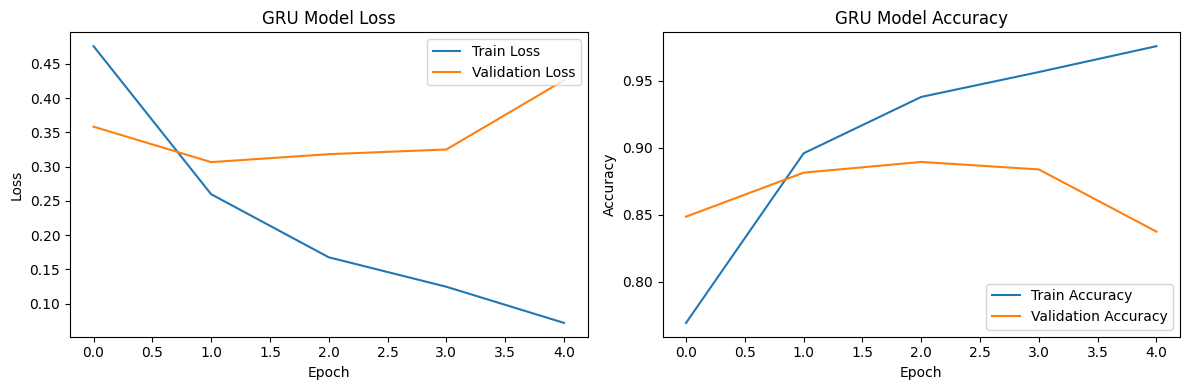

In [4]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history_gru.history['loss'], label='Train Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title('GRU Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_gru.history['accuracy'], label='Train Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='Validation Accuracy')
plt.title('GRU Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step


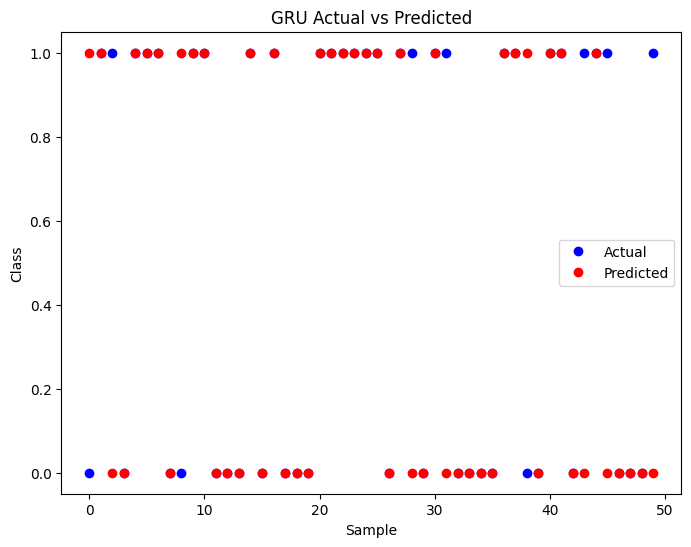

In [5]:
# Make predictions
y_pred_gru = model_gru.predict(X_test)
y_pred_gru_classes = (y_pred_gru > 0.5).astype("int32")

# Visualize predictions
plt.figure(figsize=(8, 6))
plt.plot(y_test[:50], 'bo', label='Actual')
plt.plot(y_pred_gru_classes[:50], 'ro', label='Predicted')
plt.title('GRU Actual vs Predicted')
plt.xlabel('Sample')
plt.ylabel('Class')
plt.legend()
plt.show()

## Conclusion

In this section, we delved into Gated Recurrent Unit (GRU) networks, a simplified yet powerful variant of recurrent neural networks (RNNs). We applied GRUs to the IMDB dataset for sentiment analysis, demonstrating the process of defining, training, and evaluating a GRU model using TensorFlow and Keras. The model's performance was visualized, showcasing both the training history and a comparison of actual vs. predicted labels. GRUs are particularly effective in scenarios where computational efficiency and limited training data are considerations, making them a valuable tool for various applications in sequential data analysis.
